# PRCP-1001-RiceLeaf (*Rice Leaf Disease using CNN*)

# Team ID: PTID-CDS-APR21-1119 


# Abstract:

- Identification of diseases from the images of a plant is one of the interesting research areas in the agriculture field, for which machine learning concepts of computer field can be applied. This project presents a simple model for detection and classification of rice diseases based on the images of infected rice plants. This model is developed after detailed experimental analysis of various techniques using VGG16, VGG19 and CNN models for image processing operations. We consider three rice plant diseases namely Bacterial leaf blight, Brown spot and Leaf smut. We achieve 91.96 % accuracy on training dataset and 86.6% accuracy on the test dataset with VGG19 model. 



# Introduction:

- Plant diseases are one of the causes in the reduction of quality and quantity of agriculture crops. Reduction in both aspects can directly affect the overall production of the crop in a country. The main problem is a lack of continuous monitoring of the plants. Sometimes newbie farmers are not aware of the diseases and its occurrence period. Generally, diseases can occur on any plant at any time. However, a continuous monitoring may prevent disease infection.The detection of a plant disease is one of the important research topics in the agriculture domain. In this project we attempt to apply concepts of Deep Learning to solve the problem of automatic detection and classification of diseases of the rice plant, which is one of the important foods in India. On any plant, diseases are caused by bacteria, fungi, and virus. For rice plants fewcommon diseases are Bacterial leaf blight, Brown spot, Leaf smut.



- Image processing operations can be applied on external appearances of infected plants. However, the symptoms of diseases are different for different plants. Some diseases may have brown color or some may have a yellow color. Each disease has its own unique characteristics. Diseases differ in shape, size, and color of disease symptoms. Some of the diseases might have the same color, but different shapes; while some have different colors but same shapes. Sometimes farmers get confused and are unable to take proper decision for selection of pesticides.Capturing the images of infected leaves and finding out the information about the disease is one way to get rid of loss of crop due to disease infection.As an automated solution of this problem, cameras can be deployed at certain distances in the farm to capture images periodically. These images can be sent to a central system for analysis of diseases; the system can detect the diseaseand give information about the disease and pesticide selection.



- At the core of such system would be to automatically recognize the disease that has occurred.



- We briefly present our approach to solving the problem of automatic detection and classification of rice plant diseases.


- 


###### **Dataset Contents**
. This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

#### **Classes**
- Leaf smut
- Brown spot
- Bacterial leaf blight

In [ ]:
# Connect to the drive.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Preprocessing Dataset

In [ ]:
#### Unzipping dataset
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/PRCP-1001-RiceLeaf.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/intership/rice leaf')
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/Data/Bacterial leaf blight-20200814T055237Z-001.zip', 'r') as zip_ref:
       zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/Data')
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/Data/Brown spot-20200814T055208Z-001.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/Data')
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/Data/Leaf smut-20200814T055530Z-001.zip', 'r') as zip_ref:
         zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/Data')

#### Spliting dataset into test and train using Splitfolder

In [ ]:
pip install split-folders

In [ ]:
import splitfolders  # or import split_folders
import os
import numpy as np
import shutil

In [ ]:
root_dir = '/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/Data'
Bacteria = '/Bacterial leaf blight'
Brown = '/Brown spot'
Smut = '/Leaf smut'

In [ ]:
#### Creating train and test folders with sub folders

os.makedirs(root_dir +'/train' + Bacteria)
os.makedirs(root_dir +'/train' + Brown)
os.makedirs(root_dir +'/train' + Smut)

os.makedirs(root_dir +'/test' + Bacteria)
os.makedirs(root_dir +'/test' + Brown)
os.makedirs(root_dir +'/test' + Smut)

In [ ]:
src1 = "/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/Data/Bacterial leaf blight" # Folder to copy images from
src2 = '/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/Data/Brown spot'
src3 = '/content/drive/MyDrive/Colab Notebooks/intership/rice leaf/Data/Leaf smut'

In [ ]:
### spliting the image data into train n test.

test_ratio = 0.12

allFileNames1 = os.listdir(src1)
np.random.shuffle(allFileNames1)
train_FileNames1, test_FileNames1 = np.split(np.array(allFileNames1),[int(len(allFileNames1)* (1 - test_ratio))])

allFileNames2 = os.listdir(src2)
np.random.shuffle(allFileNames2)
train_FileNames2, test_FileNames2 = np.split(np.array(allFileNames2),[int(len(allFileNames2)* (1 - test_ratio))])

allFileNames3 = os.listdir(src3)
np.random.shuffle(allFileNames3)
train_FileNames3, test_FileNames3 = np.split(np.array(allFileNames3),[int(len(allFileNames3)* (1 - test_ratio))])

In [ ]:
# Check train test forlders
print('Total images: ', len(allFileNames3))
print('Training: ', len(train_FileNames3))
print('Testing: ', len(test_FileNames3))

In [ ]:
####### saving train data based on its categories #######

train_FileNames1 = [src1+'/'+ name for name in train_FileNames1.tolist()]
train_FileNames2 = [src2+'/'+ name2 for name2 in train_FileNames2.tolist()]
train_FileNames3 = [src3+'/'+ name3 for name3 in train_FileNames3.tolist()]

for name1 in train_FileNames1:
    shutil.copy(name1, "/content/drive/MyDrive/RiceDataset/Data/train"+Bacteria)
for name2 in train_FileNames2:
    shutil.copy(name2, "/content/drive/MyDrive/RiceDataset/Data/train"+Brown)
for name3 in train_FileNames3:
    shutil.copy(name3, "/content/drive/MyDrive/RiceDataset/Data/train"+Smut)

In [ ]:
###### saving test data based on its categories #######

test_FileNames1 = [src1+'/' + test1 for test1 in test_FileNames1.tolist()]
test_FileNames2 = [src2+'/' + test2 for test2 in test_FileNames2.tolist()]
test_FileNames3 = [src3+'/' + test3 for test3 in test_FileNames3.tolist()]

for test1 in test_FileNames1:
    shutil.copy(test1, "/content/drive/MyDrive/RiceDataset/Data/test"+Bacteria)
for test2 in test_FileNames2:
    shutil.copy(test2, "/content/drive/MyDrive/RiceDataset/Data/test"+Brown)
for test3 in test_FileNames3:
    shutil.copy(test3, "/content/drive/MyDrive/RiceDataset/Data/test"+Smut)

## Importing Libraries

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from sklearn.model_selection import KFold
from PIL import Image
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/RiceDataset/Data/train'
test_path = '/content/drive/MyDrive/RiceDataset/Data/test'

In [ ]:
# useful for getting number of classes
folders = glob('/content/drive/MyDrive/RiceDataset/Data/train/*')

# Our Approach

- This section describes our proposed method of recognizing rice leaf diseases.The entire process is partitioned into different stages: beginning with the preparation of a novel training dataset, development of a CNN model and finally, classification of the rice leaf diseases


### Implementation of Transfer learning and CNN Models

- In this project, we proposed different models to recognize rice leaf diseases by reducing the network parameters. Using a  dataset of 120 rice leaf disease images, we used VGG16, VGG19 and CNN models to identify three common rice leaf diseases.

### VGG16

- VGG16 is a convolution neural net (CNN ) architecture is considered to be one of the excellent vision model architecture till date.... It follows the arrangement of convolution and max pool layers consistently throughout the whole architecture.

In [ ]:
# Creating model 
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Skip training existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# Adding layers
x = Flatten()(vgg.output)

# Using Softmax activation function for multiclass classification
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Compiling model and optimization

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

#### Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.
#### The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class

#### Here we have imported ImageDataGenerator from keras.preprocessing. The objective of ImageDataGenerator is to import data with labels easily into the model. It is a very useful class as it has many function to rescale, rotate, zoom, flip etc. The most useful thing about this class is that it doesn’t affect the data stored on the disk. This class alters the data on the go while passing it to the model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Augmentation configuration for training
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.5,
                                   zoom_range = 0.5,
                                   horizontal_flip = True)

# Generator to read pictures found from subfolers of 'data/train', generate batches of augmented image data
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/RiceDataset/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 25,
                                                 class_mode = 'categorical')

# Augmentation configuration for testing(only rescaling)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for validation data
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/RiceDataset/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 25,
                                            class_mode = 'categorical')


Found 104 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


#### We are using model.fit_generator as ImageDataGenerator to pass data to the model. we will pass train and test dataset to fit_generator. In fit_generator steps_per_epoch will set the batch size to pass training data to the model and validation_steps will do the same for test data.

##### Effect of Epochs. 
- Various number of epochs are used to train the proposed VGG16 model under default settings. The best tuned epoch is 15, as there are no further improvements in training and validation accuracies found for our model.


In [ ]:
# Fitting VGG16 model to train and test data
r = model.fit_generator(train_set,
                        validation_data=test_set,
                        epochs=15,
                        steps_per_epoch=len(train_set),
                        validation_steps=len(test_set),
                       )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
5/5 [==============================] - 72s 5s/step - loss: 1.7308 - accuracy: 0.3325 - val_loss: 1.4620 - val_accuracy: 0.4000
Epoch 2/15
5/5 [==============================] - 4s 774ms/step - loss: 1.4433 - accuracy: 0.5209 - val_loss: 1.0260 - val_accuracy: 0.5333
Epoch 3/15
5/5 [==============================] - 4s 978ms/step - loss: 0.8945 - accuracy: 0.5363 - val_loss: 0.6272 - val_accuracy: 0.7333
Epoch 4/15
5/5 [==============================] - 4s 773ms/step - loss: 0.6754 - accuracy: 0.7412 - val_loss: 0.4253 - val_accuracy: 0.9333
Epoch 5/15
5/5 [==============================] - 4s 764ms/step - loss: 0.4761 - accuracy: 0.8223 - val_loss: 0.4115 - val_accuracy: 0.8667
Epoch 6/15
5/5 [==============================] - 4s 790ms/step - loss: 0.4477 - accuracy: 0.8110 - val_loss: 0.3610 - val_accuracy: 0.9333
Epoch 7/15
5/5 [==============================] - 4s 767ms/step - loss: 0.4104 - accuracy: 0.8518 - val_loss: 0.3600 - val_accuracy: 0.8667
Epoch 8/15
5/5 [======

#### Once we have trained the model we can visualise training/validation accuracy and loss.

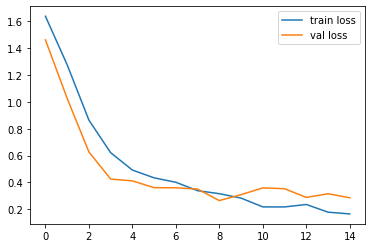

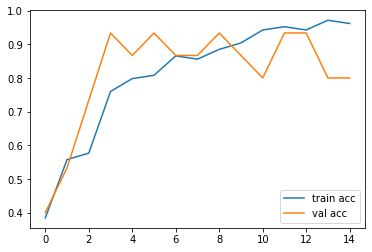

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

2


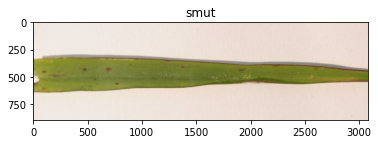

In [ ]:
### Predicting Image from test data

from PIL import Image
test_image=r'/content/drive/MyDrive/RiceDataset/Data/test/Leaf smut/DSC_0317.JPG'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['Bacterial','Brown','smut']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

***Insights***
- val_loss decreasing and val_acc is increasing, this means our model VGG16 is not overfitting.
- The model built is learning and is working fine.
- Model is predicting the images correctly.

## VGG19
#### VGG19 is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer)

In [ ]:
# Creating model 
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
# Skip training existing weights
for layer in vgg19.layers:
  layer.trainable = False

In [ ]:
# Adding layers
y = Flatten()(vgg19.output)

# Using Softmax activation function for multiclass classification
prediction_vgg19 = Dense(len(folders), activation='softmax')(y)

In [ ]:
# create a model object
model_vgg19 = Model(inputs=vgg19.input, outputs=prediction_vgg19)

In [ ]:
# view the structure of the model
model_vgg19.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# Compiling model and optimization
model_vgg19.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Fitting VGG19 model to train and test data
s = model_vgg19.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set),
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 6s 1s/step - loss: 1.8491 - accuracy: 0.3524 - val_loss: 1.7219 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 4s 794ms/step - loss: 1.6495 - accuracy: 0.3803 - val_loss: 1.1129 - val_accuracy: 0.6000
Epoch 3/10
5/5 [==============================] - 4s 970ms/step - loss: 1.0510 - accuracy: 0.4841 - val_loss: 0.9872 - val_accuracy: 0.7333
Epoch 4/10
5/5 [==============================] - 4s 978ms/step - loss: 0.7376 - accuracy: 0.7510 - val_loss: 0.5715 - val_accuracy: 0.8000
Epoch 5/10
5/5 [==============================] - 4s 979ms/step - loss: 0.7597 - accuracy: 0.7207 - val_loss: 0.4933 - val_accuracy: 0.8667
Epoch 6/10
5/5 [==============================] - 4s 982ms/step - loss: 0.8507 - accuracy: 0.7549 - val_loss: 0.6756 - val_accuracy: 0.6667
Epoch 7/10
5/5 [==============================] - 4s 972ms/step - loss: 0.9922 - accuracy: 0.5446 - val_loss: 0.6208 - val_accuracy: 0.7333
Epoch 8/10
5/5 [=======

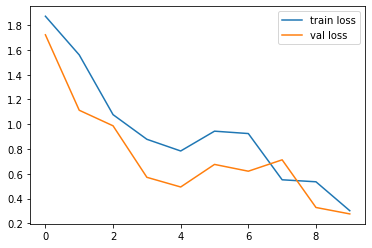

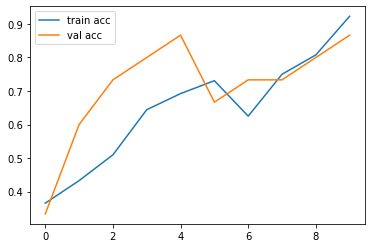

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(s.history['loss'], label='train loss')
plt.plot(s.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(s.history['accuracy'], label='train acc')
plt.plot(s.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

0


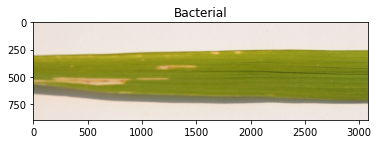

In [ ]:
### Predicting Random Image from test data

test_image1=r'/content/drive/MyDrive/RiceDataset/Data/test/Bacterial leaf blight/DSC_0392.JPG'
image_result1=Image.open(test_image1)

from tensorflow.keras.preprocessing import image
test_image1=image.load_img(test_image1,target_size=(224,224))
test_image1=image.img_to_array(test_image1)
test_image1=test_image1/255
test_image1=np.expand_dims(test_image1,axis=0)
result1=model_vgg19.predict(test_image1)
print(np.argmax(result1))
Categories=['Bacterial','Brown','smut']
image_result1=plt.imshow(image_result1)
plt.title(Categories[np.argmax(result1)])
plt.show()

***Insights***
- Based on history of val_loss and val_acc of VGG19 model , this model is also not overfitting.
- The model built is not crammimg values but it is learning and working fine.
- Model is predicting the images correctly.

## CNN
#### We will be using Sequential method as we are creating sequential model.
#### Sequential model means that all the layers of the model will be arranged in sequence.

In [ ]:
# Building the Neural Network model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# Adding Layers
model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Augmentation configuration for training
train_data = ImageDataGenerator( rotation_range=40,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       rescale=1./255,
                       shear_range=0.2,
                       zoom_range=0.2,
                       horizontal_flip=True,
                      fill_mode='nearest')

# Augmentation configuration for testing(only rescaling)
test_data = ImageDataGenerator(rescale=1./255)

# Generator to read pictures found from subfolers of 'data/train', generate batches of augmented image data
train_set = train_data.flow_from_directory('/content/drive/MyDrive/RiceDataset/Data/train', 
                    target_size=(224, 224),  
                    batch_size=30,
                    class_mode='categorical')

# Generator for validation data
test_set = test_data.flow_from_directory('/content/drive/MyDrive/RiceDataset/Data/test',
                   target_size=(224, 224),
                   batch_size=25,
                   class_mode='categorical')

Found 104 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [ ]:
# Fitting VGG19 model to train and test data
cnn = model.fit_generator(
        train_set,
        steps_per_epoch=len(train_set),
        epochs=20,
        validation_data=test_set,
        validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
4/4 [==============================] - 82s 17s/step - loss: 1.0884 - accuracy: 0.3965 - val_loss: 1.1110 - val_accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 1.1934 - accuracy: 0.2743 - val_loss: 1.0925 - val_accuracy: 0.4667
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 1.1007 - accuracy: 0.3934 - val_loss: 1.0862 - val_accuracy: 0.4000
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 1.1011 - accuracy: 0.3590 - val_loss: 1.0820 - val_accuracy: 0.4667
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 1.0888 - accuracy: 0.3749 - val_loss: 1.0729 - val_accuracy: 0.4667
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 1.0919 - accuracy: 0.4057 - val_loss: 1.0617 - val_accuracy: 0.4667
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 1.0768 - accuracy: 0.4267 - val_loss: 1.0431 - val_accuracy: 0.4667
Epoch 8/20
4/4 [=======================

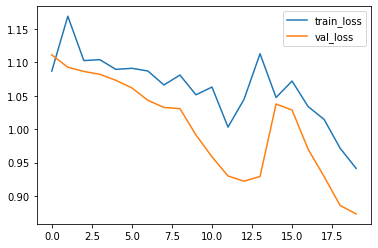

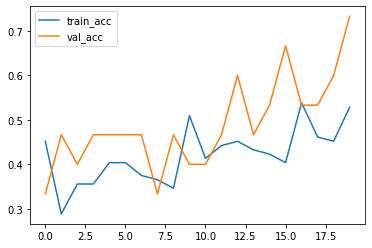

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(cnn.history['loss'], label='train_loss')
plt.plot(cnn.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn.history['accuracy'], label='train_acc')
plt.plot(cnn.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

2


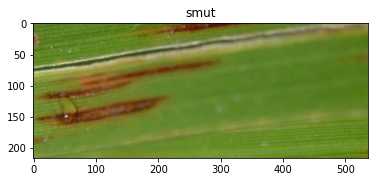

This Rice Leaf is affected by Leaf smut disease.


In [ ]:
### Predicting random image from test data

test_image=r'/content/drive/MyDrive/RiceDataset/Data/test/Leaf smut/DSC_0510.jpg'
image_result=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['Bacterial','Brown','smut']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()
if (model.predict_classes(test_image)==0):
    print ("This Rice Leaf is affected by Bacterial leaf blight disease.")
elif (model.predict_classes(test_image)==1):
    print ("This Rice Leaf is affected by Brown spot disease.")
else:
     print ("This Rice Leaf is affected by Leaf smut disease.")

# Conclusion

- #### The purpose of this research was to identify the effective strategies for dealing with rice leaf disease detection.

- #### The rice leaf suffers from several bacterial, viral, or fungal diseases and these diseases reduce rice production significantly.To sustain rice demand for a vast population globally, the recognition of rice leaf diseases is crucially important.
- #### However, recognition of rice leaf disease is limited to the image backgrounds and image capture conditions.

- #### Our model is trained with 3 different model VGG16,VGG19 and finaly CNN to recognize the rice leaf diseases ,i.e Bacterial leaf blight disease, Brown spot disease and Leaf smut disease.
- #### All 3 model have performed well with high accuracy of predicting the given image at the end.

- #### Looking into the visulization plot for all the 3 model , we can conclude VGG19 has less validation loss and high validation accuracy. Despite having better accuracy, we aim to improve the reliability and robustness of our model on different and large datasets. We would like to work on classifying rice leaf disease images when complex backgrounds are present and have varied illumination condition.

- #### Using this model farmers/agriculturist can predict the disease accuratly and treat the corp well to get high yeild in paddy.